In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

In [3]:
train_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [4]:
test_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [7]:
num_attributes = train_data.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'educational-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'income_>50K'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

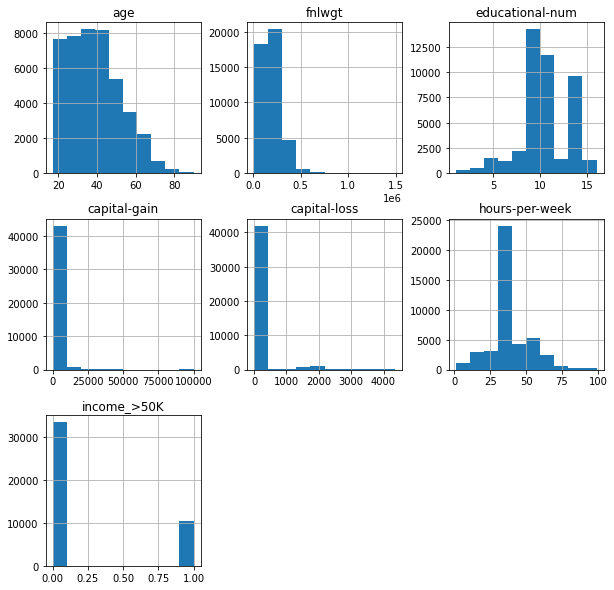

In [8]:
num_attributes.hist(figsize=(10,10))

In [9]:
train_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
cat_attributes = train_data.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


In [11]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, type):
    self.type = type
  
  def fit(self, X, y=None):
    return self
  
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

In [12]:
num_pipeline = Pipeline(steps=[
    ("num_attr_selector", ColumnsSelector(type='int64')),
    ("scaler", StandardScaler())
])

In [13]:
class CategoricalImputer(BaseEstimator, TransformerMixin):
  
  def __init__(self, columns = None, strategy='most_frequent'):
    self.columns = columns
    self.strategy = strategy
    
    
  def fit(self,X, y=None):
    if self.columns is None:
      self.columns = X.columns
    
    if self.strategy is 'most_frequent':
      self.fill = {column: X[column].value_counts().index[0] for 
        column in self.columns}
    else:
      self.fill ={column: '0' for column in self.columns}
      
    return self
      
  def transform(self,X):
    X_copy = X.copy()
    for column in self.columns:
      X_copy[column] = X_copy[column].fillna(self.fill[column])
    return X_copy

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-13-3222bed643bc>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.strategy is 'most_frequent':


In [14]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
  
  def __init__(self, dropFirst=True):
    self.categories=dict()
    self.dropFirst=dropFirst
    
  def fit(self, X, y=None):
    join_df = pd.concat([train_data, test_data])
    join_df = join_df.select_dtypes(include=['object'])
    for column in join_df.columns:
      self.categories[column] = join_df[column].value_counts().index.tolist()
    return self
    
  def transform(self, X):
    X_copy = X.copy()
    X_copy = X_copy.select_dtypes(include=['object'])
    for column in X_copy.columns:
      X_copy[column] = X_copy[column].astype({column:
                CategoricalDtype(self.categories[column])})
    return pd.get_dummies(X_copy, drop_first=self.dropFirst)

In [15]:
cat_pipeline = Pipeline(steps=[
    ("cat_attr_selector", ColumnsSelector(type='object')),
    ("cat_imputer", CategoricalImputer(columns=
          ['workclass','occupation', 'native-country'])),
    ("encoder", CategoricalEncoder(dropFirst=True))
])

In [16]:
full_pipeline = FeatureUnion([("num_pipe", num_pipeline), 
                ("cat_pipeline", cat_pipeline)])

In [17]:
train_data.drop(['fnlwgt', 'education'], axis=1, inplace=True)
test_data.drop(['fnlwgt', 'education'], axis=1, inplace=True)

In [18]:
train_copy = train_data.copy()
train_copy["income_>50K"] = train_copy["income_>50K"].apply(lambda x:0 if 
                        x==0 else 1)
X_train = train_copy.drop('income_>50K', axis =1)
Y_train = train_copy['income_>50K']

In [19]:
X_train

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,67,Private,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States
1,17,Private,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States
2,31,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
3,58,State-gov,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,25,State-gov,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
43953,19,Private,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
43954,30,Private,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States
43955,46,Private,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States


In [20]:
Y_train

0        1
1        0
2        1
3        0
4        0
        ..
43952    1
43953    0
43954    0
43955    0
43956    0
Name: income_>50K, Length: 43957, dtype: int64

In [21]:
X_train_processed=full_pipeline.fit_transform(X_train)
model = LogisticRegression(random_state=0)
model.fit(X_train_processed, Y_train)

C:\Users\Nishant\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [22]:
X_test_processed = full_pipeline.fit_transform(test_data)
predicted_outcome = model.predict(X_test_processed)

In [23]:
predicted_outcome

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [24]:
df=pd.DataFrame(predicted_outcome)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
894,1
895,0
896,0
897,0


In [25]:
df.to_csv('predictedoutcome.csv')